# Test Note book

In [1]:
import pandas as pd

# setting
from utils import YzSQL
from utils import query_trade_cal
from modules.cross_section_calculation import CrossSectionCal

import datetime
import pandas as pd

raw_con = YzSQL('data/raw_data.sql')
fact_con = YzSQL('data/factor_data.sql')
result_con = YzSQL('data/factor_result.sql')
start_date = '2020-1-1'
end_date = '2022-12-31'

Connect success
Connect success
Connect success


## Cross section test

In [2]:
trade_cal = query_trade_cal(yz_sql=raw_con, start_date=start_date, end_date=end_date)

In [3]:
result_dict = {}

for trade_date in trade_cal.index:
    cs = CrossSectionCal(factor_con=fact_con, trade_date=trade_date, predict_n=20)
    cs.add_factor_data(factor_name='bm')
    cs.result_cal(factor_name='bm')
    result_dict[trade_date] = cs.result

In [4]:
result_dict[datetime.date(2022, 11, 4)]['bm']

,2022-11-04
IC,0.215970
RankIC,0.285479
Lambda,NaN


In [5]:
bm_result = [ _['bm'] for _ in result_dict.values()]
bm_result = pd.concat(bm_result, axis=1)
bm_result.T

,2020-10-09,2020-10-12,2020-10-13,2020-10-14,2020-10-15,2020-10-16,2020-10-19,2020-10-20,2020-10-21,2020-10-22,...,2022-12-19,2022-12-20,2022-12-21,2022-12-22,2022-12-23,2022-12-26,2022-12-27,2022-12-28,2022-12-29,2022-12-30
IC,-0.037378,-0.036698,0.002838,0.067788,0.045470,0.024900,0.059974,0.124067,0.125046,0.104442,...,-0.037296,-0.034481,-0.044786,-0.053804,-0.055002,-0.055178,-0.061748,-0.069325,-0.072507,-0.079482
RankIC,0.007739,0.009679,0.064449,0.152161,0.123154,0.094169,0.138388,0.221117,0.232137,0.200593,...,-0.016756,-0.012714,-0.024714,-0.035268,-0.037393,-0.035732,-0.041943,-0.050076,-0.052718,-0.060457
Lambda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot: >

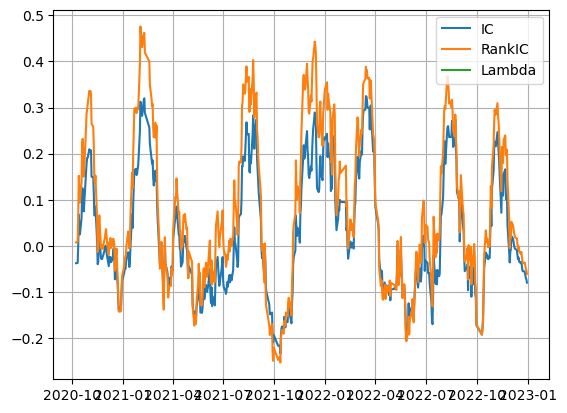

In [9]:
bm_result.T.plot(grid='both')

In [7]:
group_result = [ _['bm_grouped_result'] for _ in result_dict.values()]
group_result = pd.concat(group_result, axis=1)
group_result

,2020-10-09,2020-10-12,2020-10-13,2020-10-14,2020-10-15,2020-10-16,2020-10-19,2020-10-20,2020-10-21,2020-10-22,...,2022-12-19,2022-12-20,2022-12-21,2022-12-22,2022-12-23,2022-12-26,2022-12-27,2022-12-28,2022-12-29,2022-12-30
IC,-0.537159,-0.517436,0.040196,0.749347,0.544111,0.395835,0.657058,0.840941,0.891193,0.824153,...,-0.309749,-0.334025,-0.366195,-0.412715,-0.415908,-0.412153,-0.440188,-0.478426,-0.467604,-0.486119
RankIC,-0.757576,-0.757576,-0.115152,0.515152,0.418182,0.272727,0.648485,0.696970,0.866667,0.769697,...,-0.466667,-0.527273,-0.575758,-0.587879,-0.612121,-0.587879,-0.551515,-0.587879,-0.612121,-0.600000


<AxesSubplot: >

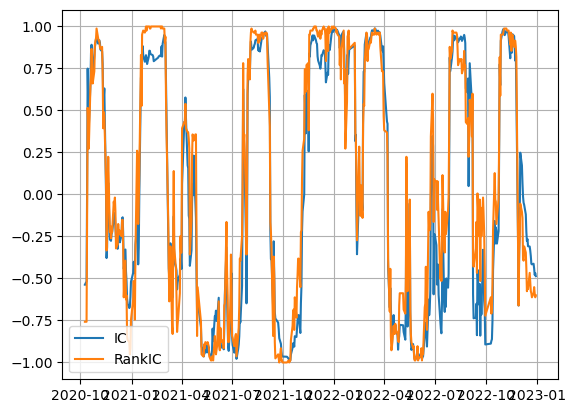

In [10]:
group_result.T.plot(grid='both')

In [11]:
bm_result.T.mean()

IC        0.030874
RankIC    0.083919
Lambda         NaN
dtype: float64

In [12]:
bm_result.T.std()

IC        0.132714
RankIC    0.168824
Lambda         NaN
dtype: float64

In [13]:
bm_result.T.mean()/bm_result.T.std()

IC        0.232635
RankIC    0.497081
Lambda         NaN
dtype: float64